<a href="https://colab.research.google.com/github/sedanurozer/cifar10/blob/main/cifar10_84_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, DepthwiseConv2D

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#loading the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
x_train=x_train/255.0
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test=x_test/255.0
x_test.shape

(10000, 32, 32, 3)

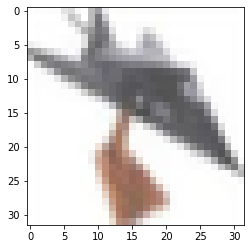

In [6]:
plt.imshow(x_test[215])

In [7]:
model_layers = [
    Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu', depth_multiplier=3),
#     MaxPooling2D(2, 2),
    Dropout(rate =0.1),
    
    
    Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.1),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation='relu'),
    
    
    Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(3,3), strides=(1, 1), padding='same', activation='relu'),
    
    
    
    Conv2D(512, (1, 1), activation='relu', strides=(2, 2), padding='same'),
    BatchNormalization(),
    DepthwiseConv2D(kernel_size=(1,1), strides=(1, 1), padding='same', activation='relu'),
    
#     MaxPooling2D(2, 2),
    Dropout(rate = 0.4),
    
    Flatten(),
    Dropout(rate = 0.3),
    Dense(2048, activation='relu'),
    Dropout(rate = 0.3),
    Dense(512, activation='relu'),
    Dropout(rate = 0.4),
    Dense(10, activation='softmax')
] 
model = Sequential(model_layers)

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [9]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 56s 16ms/step - loss: 1.6187 - sparse_categorical_accuracy: 0.4042
Epoch 2/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.0250 - sparse_categorical_accuracy: 0.6411
Epoch 3/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8730 - sparse_categorical_accuracy: 0.6936
Epoch 4/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7848 - sparse_categorical_accuracy: 0.7289
Epoch 5/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7107 - sparse_categorical_accuracy: 0.7568
Epoch 6/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6587 - sparse_categorical_accuracy: 0.7714
Epoch 7/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6191 - sparse_categorical_accuracy: 0.7846
Epoch 8/20
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5789 - sparse_categorical_accuracy: 0.7999
Epoch 9/20
1563/

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4808 - sparse_categorical_accuracy: 0.8426


In [12]:
print("Test accuracy: {}".format(test_accuracy*100))

Test accuracy: 84.25999879837036
